# Corpora and Scikit-learn

In [36]:
import nltk
import pandas as pd
import sklearn

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
%ls /Users/james/nltk_data/corpora/gutenberg

README                   burgess-busterbrown.txt  milton-paradise.txt
austen-emma.txt          carroll-alice.txt        shakespeare-caesar.txt
austen-persuasion.txt    chesterton-ball.txt      shakespeare-hamlet.txt
austen-sense.txt         chesterton-brown.txt     shakespeare-macbeth.txt
bible-kjv.txt            chesterton-thursday.txt  whitman-leaves.txt
blake-poems.txt          edgeworth-parents.txt
bryant-stories.txt       melville-moby_dick.txt


In [6]:
whitmanWords = nltk.corpus.gutenberg.words('whitman-leaves.txt')

In [7]:
whitmanWords[150:300]

['.', 'Of', 'physiology', 'from', 'top', 'to', 'toe', ...]

In [8]:
gutenbergDict = { fileid: nltk.corpus.gutenberg.words(fileid) for fileid in nltk.corpus.gutenberg.fileids()}

In [9]:
[ f"{fileid}: {tokens[:12]}" for fileid, tokens in gutenbergDict.items()]

["austen-emma.txt: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma']",
 "austen-persuasion.txt: ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ']', 'Chapter', '1', 'Sir', 'Walter', 'Elliot']",
 "austen-sense.txt: ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The']",
 "bible-kjv.txt: ['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King']",
 "blake-poems.txt: ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', 'SONGS', 'OF', 'INNOCENCE', 'AND', 'OF']",
 "bryant-stories.txt: ['[', 'Stories', 'to', 'Tell', 'to', 'Children', 'by', 'Sara', 'Cone', 'Bryant', '1918', ']']",
 "burgess-busterbrown.txt: ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920']",
 'carroll-alice.txt: [\'[\', \'Alice\', "\'", \'s\', \'Adventures\', \'in\', \'Wonderland\', \'by\', \'Lewis\', \'Carroll\', \'1865\', \']\']',
 "chesterton-ball.txt: ['['

In [10]:
# gutenbergLowered= {} 
# for fileid, tokens in gutenbergDict.items():
#     loweredTokens = [token.lower() for token in tokens]
#     gutenbergLowered[fileid] = loweredTokens

gutenbergLowered = { fileid: [token.lower() for token in tokens] for fileid, tokens in gutenbergDict.items() }

In [11]:
gutenbergFreqs = { fileid: nltk.FreqDist(tokens) for fileid, tokens in gutenbergLowered.items() }

In [12]:
whitmanFreqs = nltk.FreqDist(whitmanWords)

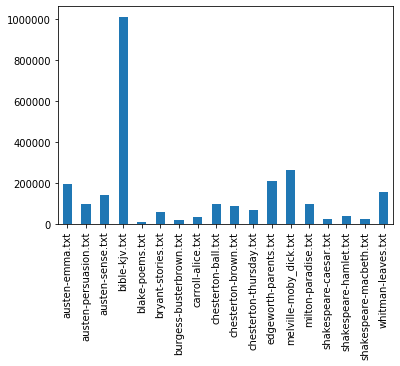

In [13]:
gutenbergDf = pd.DataFrame(gutenbergFreqs)
pd.Series({ fileid: len(words) for fileid, words in gutenbergLowered.items() }).plot(kind='bar')

In [14]:

gutenbergLengths = pd.Series({ fileid: len(words) for fileid, words in gutenbergLowered.items() })

In [15]:
gutenbergPercentagesDF = gutenbergDf / gutenbergLengths

In [16]:
gutenbergPercentagesDF = gutenbergPercentagesDF.fillna(0)

In [17]:
gutenbergPercentagesDF.loc['him']

austen-emma.txt            0.003944
austen-persuasion.txt      0.004757
austen-sense.txt           0.004535
bible-kjv.txt              0.006589
blake-poems.txt            0.001317
bryant-stories.txt         0.005327
burgess-busterbrown.txt    0.005959
carroll-alice.txt          0.001261
chesterton-ball.txt        0.003495
chesterton-brown.txt       0.004369
chesterton-thursday.txt    0.004031
edgeworth-parents.txt      0.004666
melville-moby_dick.txt     0.004091
milton-paradise.txt        0.003615
shakespeare-caesar.txt     0.006426
shakespeare-hamlet.txt     0.004764
shakespeare-macbeth.txt    0.003889
whitman-leaves.txt         0.001253
Name: him, dtype: float64

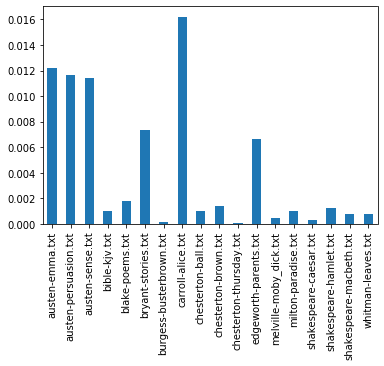

In [20]:
pd.Series(gutenbergPercentagesDF.loc['she']).plot(kind='bar')

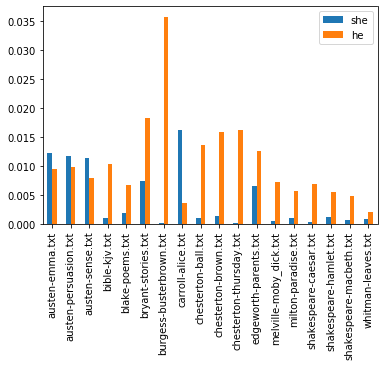

In [22]:
gutenbergPercentagesDF.loc[['she','he']].T.plot(kind='bar')

In [32]:
def typeTokenRatio(tokens):
    return len(set(tokens)) / len(tokens)

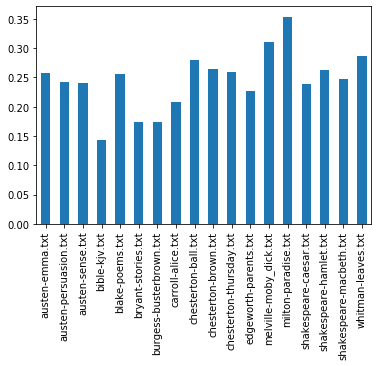

In [35]:
pd.Series({ fieldid: typeTokenRatio(tokens[4000:8000]) for fieldid, tokens in gutenbergLowered.items() }).plot(kind='bar')

# Introducing Sci-kit learn

In [ ]:
sklearn.feature_extraction.text.CountVectorizer

Strip_accents: é café -> cafe
Also, show me the words which appear in all documents

In [39]:
whitmanRaw = nltk.corpus.gutenberg.raw('whitman-leaves.txt')

In [49]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
whitmanVecs = vectorizer.fit_transform([whitmanRaw])
whitmanCounts = whitmanVecs.todense()
whitmanWords = vectorizer.get_feature_names()

In [54]:
pd.Series({word: count for word, count in list(zip(whitmanWords, whitmanCounts))})

10    [[[[[7 7 8 ... 1 5 1]]]]]
dtype: object

In [52]:
zip(whitmanWords, whitmanCounts)

In [56]:
pd.DataFrame(whitmanCounts, columns=whitmanWords).T

0
10      7
11      7
12      8
13      6
14      5
...    ..
zee     1
zeus    1
zinc    1
zones   5
zuyder  1

[12379 rows x 1 columns]

In [57]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
whitmanVecs = vectorizer.fit_transform([whitmanRaw])

In [58]:
fileids = nltk.corpus.gutenberg.fileids()

In [59]:
gutenbergTexts = [nltk.corpus.gutenberg.raw(fileid) for fileid in fileids]

In [65]:
gutenbergVecs = vectorizer.fit_transform(gutenbergTexts).todense()

In [67]:
gutenbergVecs.shape

(42063, 18)

In [73]:
gutenbergCounts = pd.DataFrame(gutenbergVecs, columns=vectorizer.get_feature_names(), index=fileids)

In [76]:
gutenbergFreqs = gutenbergCounts.T / gutenbergLengths

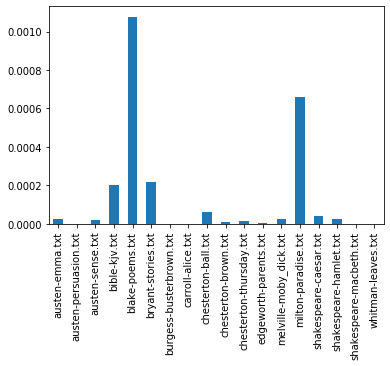

In [79]:
gutenbergFreqs.loc['angel'].plot(kind='bar')

In [81]:
def getDate(tokens):
    for token in tokens:
        if token.isnumeric():
            return token

In [83]:
gutenbergWords = [nltk.corpus.gutenberg.words(fileid) for fileid in fileids]

In [85]:
dates = [getDate(tokens) for tokens in gutenbergWords]

In [91]:
dateFileIds = [f"{date}-{fileid}" for date, fileid in zip(dates, fileids)]

In [92]:
dateFileIds

['1816-austen-emma.txt',
 '1818-austen-persuasion.txt',
 '1811-austen-sense.txt',
 '1-bible-kjv.txt',
 '1789-blake-poems.txt',
 '1918-bryant-stories.txt',
 '1920-burgess-busterbrown.txt',
 '1865-carroll-alice.txt',
 '1909-chesterton-ball.txt',
 '1914-chesterton-brown.txt',
 '1908-chesterton-thursday.txt',
 '3-edgeworth-parents.txt',
 '1851-melville-moby_dick.txt',
 '1667-milton-paradise.txt',
 '1599-shakespeare-caesar.txt',
 '1599-shakespeare-hamlet.txt',
 '1603-shakespeare-macbeth.txt',
 '1855-whitman-leaves.txt']

In [94]:
gutenbergCounts = pd.DataFrame(gutenbergVecs, columns=vectorizer.get_feature_names(), index=dateFileIds)

In [104]:
angelCounts = gutenbergCounts.T.loc['badger']

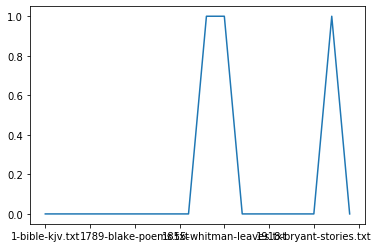

In [105]:
angelCounts.sort_index().plot()